
# Entrega 2

##### Daniel Pereira Sandino A00832699
##### Daniela Cruz Álvarez A00572205
##### Carlos Gabriel Espinosa Contreras A01198290
##### Arif Morán Velázquez A01234442

  Ya que propusieron una solución para la construcción del paquete de ondas, pongan en marcha su solución.

a) Ahora sí construyan las eigenfunciones del Hamiltoniano de la barrera de pozo de potencial. Es decir, encuentren los coeficientes que hacen que las eigenfunciones sean continuas y con derivadas continuas.

b) Programen su eigenfunción en el software de su preferencia (con Mathematica se puede usar la función Which de manera sencilla). Recuerden que para distintos intervalos de la variable x tendrán diferentes expresiones. El parámetro k ( parámetro relacionado con la energía) debe ser parte de los parámetros de su función (grafiquen y verifiquen que su eigenfunción es continua y tiene derivada continua.)

c) Grafiquen los coeficientes de reflexión y transmisión y estudien su comportamiento para diferentes alturas de la barrera. Verifiquen que su suma da 1. Hagan un pequeño reporte sobre qué esperan que suceda cuando lancen un paquete de onda con diferentes valores medios de energía.

$$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+V(x)\psi=E\psi$$

Grosor de la pared$(V_0)$ =$G$
$$a=G/2$$
Estados Ligados
$$ E<V_0$$
$$V=\frac{\sqrt{2mE}}{\hbar}$$
$$\psi=Ae^{ikx}+Be^{-ikx} x<-a$$  

$$\kappa=\frac{\sqrt{-(E-V(x)})}{\hbar}$$
$$\psi=Ce^{\kappa x}+De^{-\kappa x} -a<x<a$$
$$\psi=Fe^{ikx} x\geq a$$

Estados de dispersion
$$k=\frac{\sqrt{2mE}}{\hbar}$$
$$ E>V_0$$
$$\psi=Ae^{ikx}+Be^{-ikx} x<-a$$  


$$l=\frac{\sqrt{(E-V(x)})}{\hbar}$$
$$\psi=Ccos(lx)+Dsin(lx) -a<x<a$$
$$\psi=Fe^{ikx} x\geq a$$


Coeficientes
A,B,C,D

Analizando la parte par:
$$Fe^{-ika}=Bcos(la)$$

$$\frac{d\psi}{dx}|_a=-ikFe^{-ika}=-lBsin(la)$$



In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
G=4### Grosor total de la pared
n=2### Eigen
E=0.7#(((n*np.abs(n))*np.pi**2*hb**2)/(2*m*(2*a)**2))+V0 ##Energia
m=1 ###Masa
V0=0.5 ####Haltura del potencial
A=10 ##############Amplitud incidente
N=30000#### Numero de puntos en el eje x

In [ ]:
hb=1/(2*np.pi)#1.05457182e-34
a=G/2


In [ ]:
gg=10####Parametro para limites en grafica
xs=np.linspace(-a-gg,a+gg,N)
###Potencial
V=np.zeros(N)
V[(xs >= -a) & (xs <= a)]=V0

In [ ]:
def pip(E,m,xs,V0):
  k=np.sqrt(2*m*E)/hb####Fuera
  if E>V0:
    l=np.sqrt(2*m*(E-V0))/hb
    F=(A*np.exp(-2j*k*a))/(np.cos(2*l*a)-1j*np.sin(2*l*a)*((k**2+l**2)/(2*k*l)))
    B=(1j*np.sin(2*l*a)/(2*k*l))*(l**2-k**2)*F
    D=F*np.exp(1j*k*a)*(np.sin(l*a)+(1j*k/l)*np.cos(l*a))
    C=F*np.exp(1j*k*a)*(np.cos(l*a)-(1j*k/l)*np.sin(l*a))
    bb=C*np.cos(l*xs)+D*np.sin(l*xs)
  else:
    kappa=np.sqrt(2*m*(V0-E))/hb##################
    beta1=np.exp(1j*k*a-kappa*a)*((1j*k/kappa)+1)
    beta2=np.exp(1j*k*a+kappa*a)*((1j*k/kappa)-1)
    F=4j*k*A*np.exp(-1j*k*a)*(beta1*np.exp(-kappa*a)*(1j*k+kappa)-beta2*np.exp(kappa*a)*(1j*k-kappa))**(-1)
    B=(F/(4*1j*k*np.exp(1j*k*a)))*(beta1*np.exp(-kappa*a)*(1j*k-kappa)-beta2*np.exp(kappa*a)*(1j*k+kappa))
    D=-F*beta2/2
    C=beta1*(F/2)
    l=0
    bb=C*np.exp(kappa*xs)+D*np.exp(-kappa*xs)

  aa=A*np.exp(1j*k*xs)+B*np.exp(-1j*k*xs)
  cc=F*np.exp(1j*k*xs)
  return aa,bb,cc,k,B,C,D,F,l,k

In [ ]:
aa,bb,cc,k,B,C,D,F=pip(E,m,xs,V0)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-3.0, 3.0)

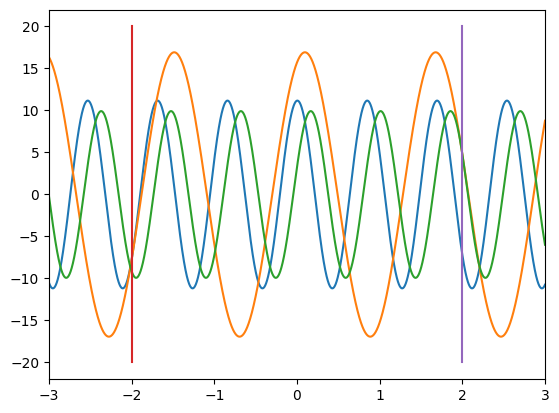

In [ ]:
plt.plot(xs,aa)
plt.plot(xs,bb)
plt.plot(xs,cc)
plt.plot(-a*np.ones(2),A*2*np.array([-1,1]))
plt.plot(a*np.ones(2),A*2*np.array([-1,1]))
plt.xlim([-a-1,a+1])

Eigen funcion dada una Energia dada$(E_n)$

In [ ]:
aaa=aa[(xs < -a)]
bbb=bb[(xs >= -a) & (xs <= a)]
ccc=cc[(xs > a)]
sol=np.concatenate((aaa,bbb,ccc))

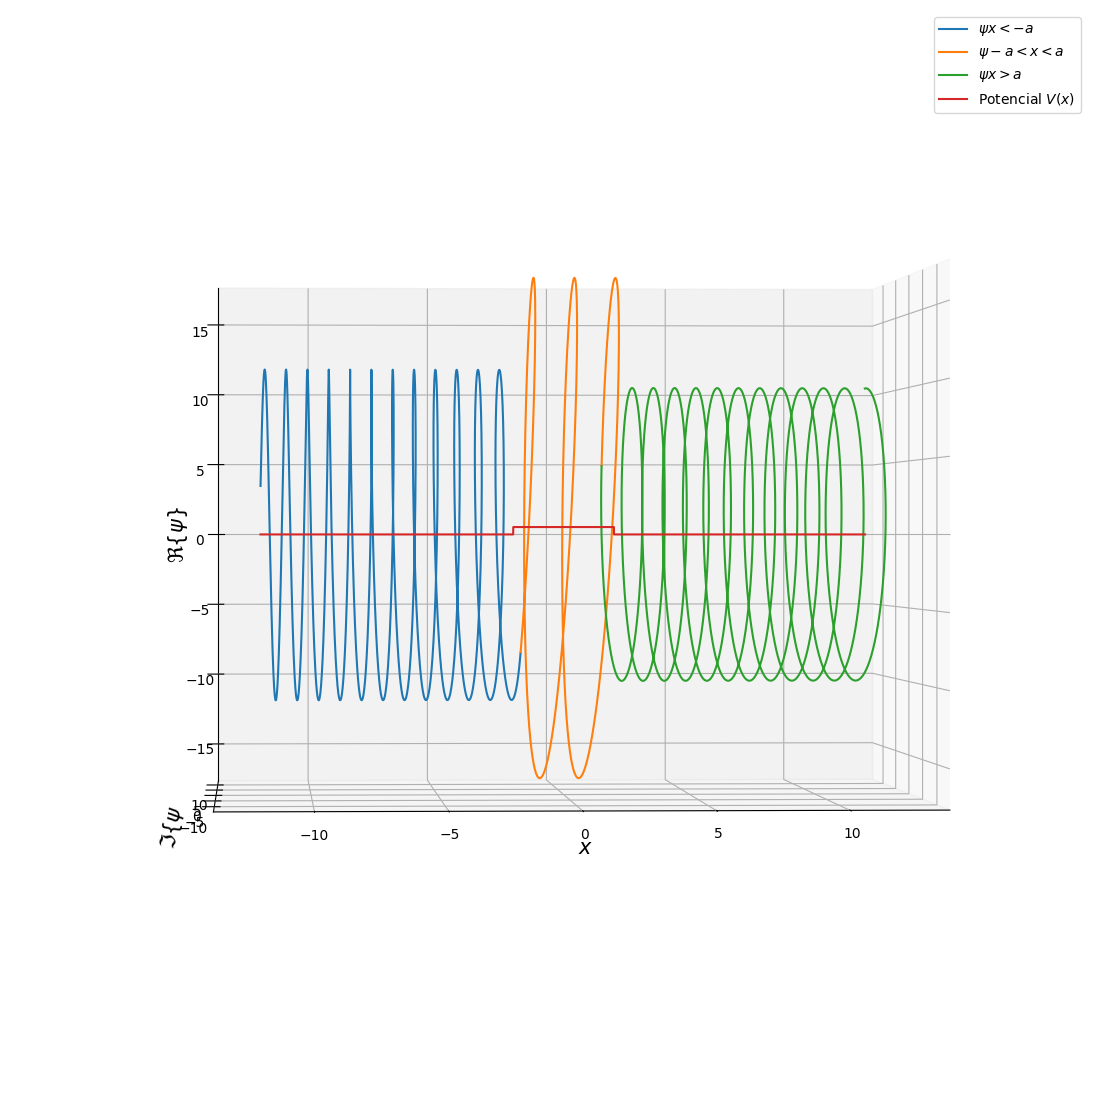

In [ ]:
fig5 = plt.figure(figsize=(18,14))
ax=fig5.add_subplot(111,projection='3d')
ax.plot(xs[(xs < -a)],np.imag(aaa),np.real(aaa),label="$\psi x<-a$")
ax.plot(xs[(xs >= -a) & (xs <= a)],np.imag(bbb),np.real(bbb),label="$ \psi -a<x<a$")
ax.plot(xs[(xs > a)],np.imag(ccc),np.real(ccc),label="$\psi x>a$")
#plt.plot(xs,np.imag(sol),(sol),label='$\psi$')
#plt.plot(xs,np.imag(df(sol,xs)),np.real(df(sol,xs)),label='$d\psi/dx$')
ax.plot(xs,np.imag(V),np.real(V),label="Potencial $V(x)$")
ax.view_init(elev=0, azim=267)
ax.set_zlabel(r'$\Re\{\psi\}$', fontsize=15)
plt.ylabel(r'$\Im\{\psi} \}$', fontsize=15)
plt.xlabel(R'$x$',fontsize=15)
plt.legend(loc='upper center')
plt.legend()
plt.grid('on')
plt.show()

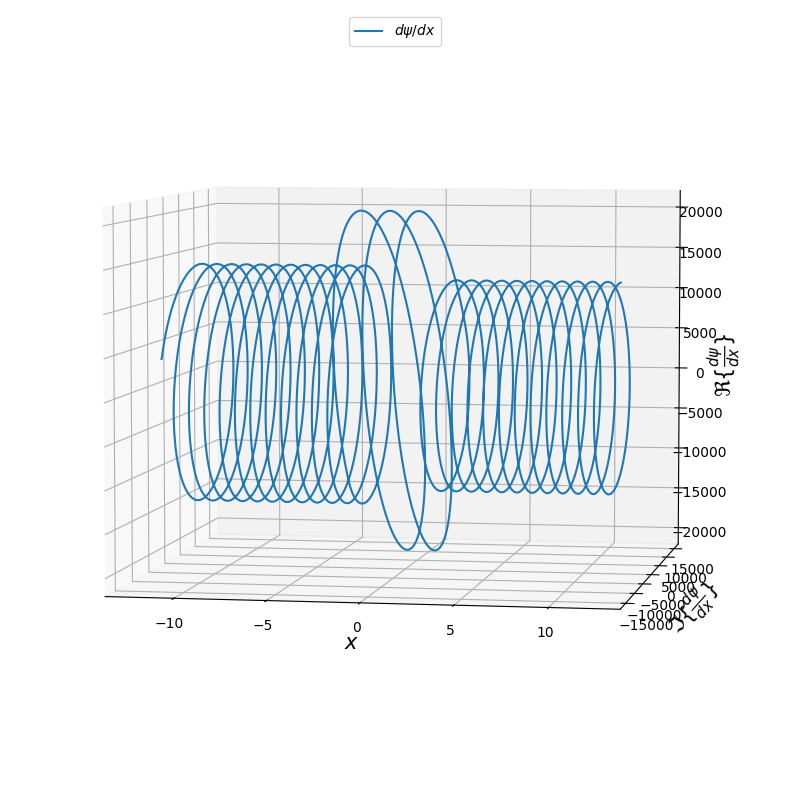

In [ ]:
fig6 = plt.figure(figsize=(15,10))
cx=fig6.add_subplot(111,projection='3d')
plt.plot(xs,np.imag(df(sol,xs)),np.real(df(sol,xs)),label='$d\psi/dx$')
cx.view_init(elev=5, azim=280)
cx.set_zlabel(r'$\Re\{\frac{d\psi}{dx}\}$', fontsize=15)
plt.ylabel(r'$\Im\{\frac{d\psi}{dx}\}$', fontsize=15)
plt.xlabel(R'$x$',fontsize=15)
plt.legend(loc='upper center')
plt.grid('on')

In [ ]:
def df(y,ts):####Derivada
    dt=np.diff(ts)[0]
    yp=y*0j
    n=len(y)
    for i in range(1,n-1):
        yp[i]=(y[i+1]+y[i-1])/(2*dt)
    yp[0]=yp[1]
    yp[-1]=yp[-2]
    return yp

Solucion Numerica (Solucion numerica de Ec Schrodinger con split step)

Grafiquen los coeficientes de reflexión y transmisión y estudien su comportamiento para diferentes alturas de la barrera. Verifiquen que su suma da 1. Hagan un pequeño reporte sobre qué esperan que suceda cuando lancen un paquete de onda con diferentes valores medios de energía.

In [ ]:
NN=1000
#nn=np.arange(0,NN,1)
#nn=nn[np.abs(nn)>0]

V0=0.5
En=np.linspace(0.001,6,NN)
Ts=np.zeros(NN)*0j
Fs=np.zeros(NN)*0j
Rs=np.zeros(NN)*0j
Bs=np.zeros(NN)*0j
Cs=np.zeros(NN)*0j
Ds=np.zeros(NN)*0j
for i in range(0,NN):
  aa,bb,cc,k,B,C,D,F,l,k=pip(En[i],m,xs,V0)
  Fs[i]=F
  Bs[i]=B
  Cs[i]=C
  Ds[i]=D
  Ts[i]=(np.abs(F/A)**2)
  Rs[i]=np.abs(B/A)**2

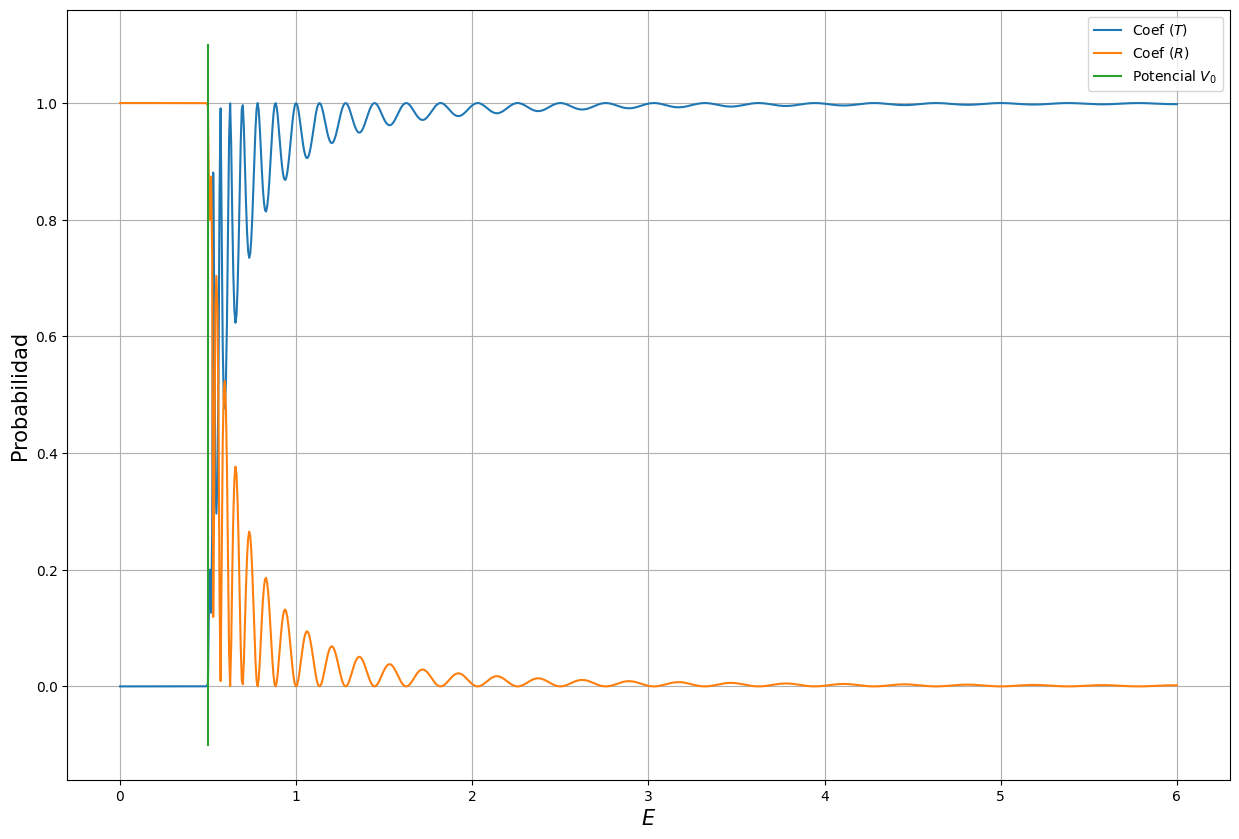

In [ ]:
fig7 = plt.figure(figsize=(15,10))
plt.plot(En,Ts,label='Coef $(T)$')
plt.plot(En,Rs,label='Coef $(R)$')
plt.plot(V0*np.ones(2),[-0.1,1.1],label='Potencial $V_0$')
plt.ylabel(r'Probabilidad', fontsize=15)
plt.xlabel(R'$E$',fontsize=15)
plt.grid('on')
plt.legend()

In [ ]:
Ts+Rs

array([1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
      

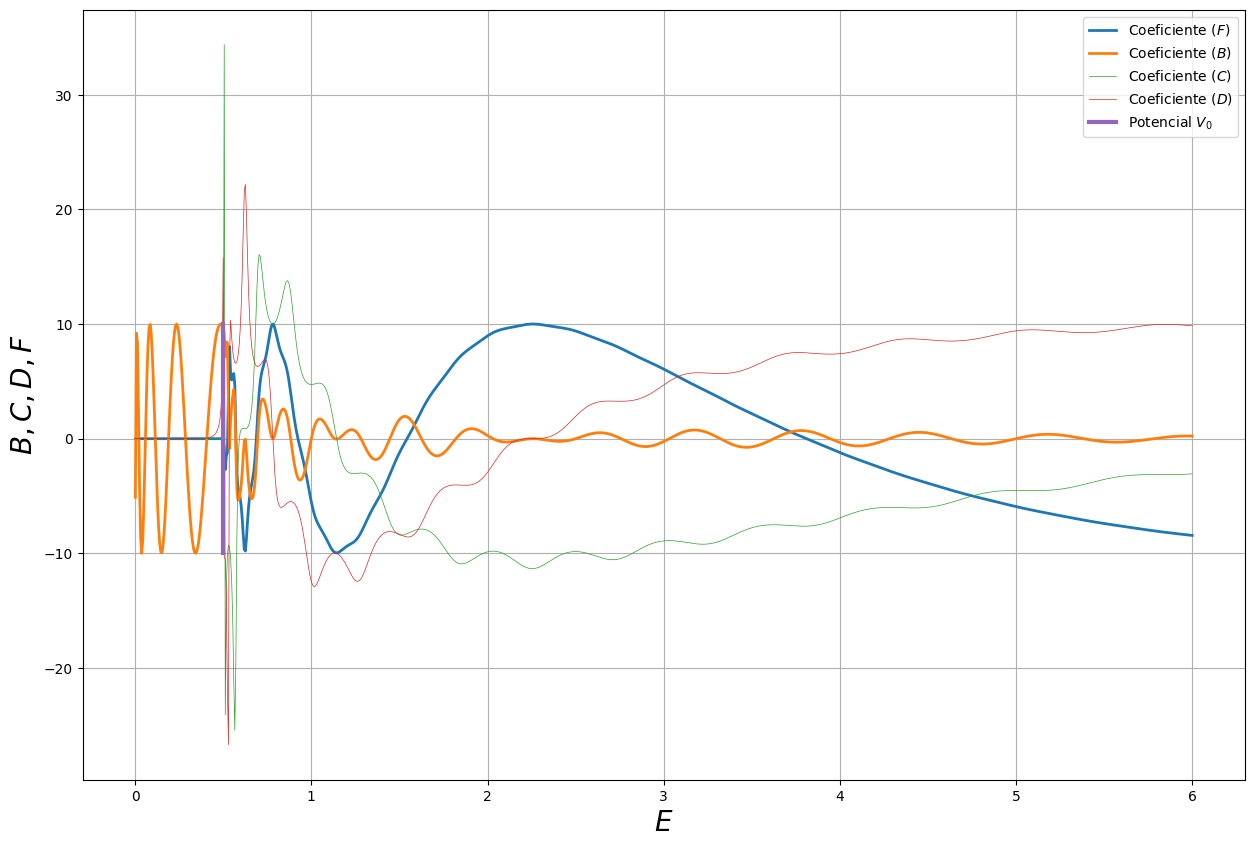

In [ ]:
fig8 = plt.figure(figsize=(15,10))
plt.plot(En,Fs,lw=2,label='Coeficiente $(F)$')
plt.plot(En,Bs,lw=2,label='Coeficiente $(B)$')
plt.plot(En,Cs,lw=1/2,label='Coeficiente $(C)$')
plt.plot(En,Ds,lw=1/2,label='Coeficiente $(D)$')
plt.plot(V0*np.ones(2),[-10,10],lw=3,label='Potencial $V_0$')
plt.ylabel(r'$B,C,D,F$', fontsize=20)
plt.xlabel('$E$',fontsize=20)
plt.grid('on')
plt.legend()